# Exploring and wrangling the data from the Delaware City monitoring station

Delaware City is one of the stations in the [Delaware Quality Air Monitoring Network](https://airmonitoring.dnrec.delaware.gov/). This is an exploration and wrangling of the data from that station.

In [153]:
""" Mount GDrive to get the data """
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
""" Get the data """
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size" : 16}) # Make readable plots


# -- GGD: note, this filename will have to be changed depending on the location 
#    of the data and where this notebook is being run
fname = '/content/gdrive/My Drive/udcovid_hack_air_quality/data/dnrec/Air_Quality_valid.csv'

if fname.endswith(".gz"):
  airdata = pd.read_csv('Air_Quality_valid.csv.gz', parse_dates=['Date_Time'], \
                        engine='c', compression='gzip')
else:
  airdata = pd.read_csv(fname, parse_dates=['Date_Time'], engine='c')

In [0]:
""" Get data from Delaware City Station """
rt9_delcity = airdata[airdata['STA_StationName'] == 'Rt #9-Delaware City']

In [0]:
print('Available measurements in the Delaware City station:\n {}'.format(rt9_delcity['MOT_MonitorName'].unique()))

Available measurements in the Delaware City station:
 ['SO2-Max5min' 'SO2 Trace Level' 'CO' 'Wind Speed V' 'Wind Dir V'
 'PM2.5 5030i IN' 'Temp' 'RH' 'PM 2.5 TAPI']


In [0]:
# You might need to change this path to the images folder:
report_dir = '/content/gdrive/My Drive/udcovid_hack_air_quality/reports/CarlosMendoza/images'
for var_label in rt9_delcity['MOT_MonitorName'].unique():
  data = rt9_delcity[rt9_delcity['MOT_MonitorName'] == var_label]
  # Discard negative values
  i_discard = data['ParamValue']<0
  print('Dicarded {} negative values in variable {}, which represents the '
        '{:.2g}% of the total data'.format(
            i_discard.sum(), var_label, i_discard.sum()/data.size))  
  data = data[~i_discard]
  plt.figure(figsize=(20,9))
  plt.semilogy(data['Date_Time'], data['ParamValue'], 'r.', markersize=0.5)
  plt.xlabel('Date')
  plt.ylabel(var_label)
  plt.title(f'{var_label} in Rt #9-Delaware City')
  var_str = var_label.replace(" ", "_")
  fname = 'rt9_delaware_city_' + var_str + "_full.png"
  fname = os.path.join(report_dir, fname)
  plt.savefig(fname, bbox_inches='tight')

After visualizing the data from all the variables, let's work with 'SO2 Trace Level', one of the variables that has data from 2020.

In [0]:
var_label = 'SO2 Trace Level'
data = rt9_delcity[rt9_delcity['MOT_MonitorName'] == var_label]


In [0]:
Jan1_2020 = pd.to_datetime('01/01/2020')
print('Total number of samples in {}: {}'.format(var_label, data.size))
data = data[data['Date_Time'] >= Jan1_2020]
print('Total number of samples in {} in 2020: {}'.format(var_label, data.size))

Total number of samples in SO2 Trace Level: 1100078
Total number of samples in SO2 Trace Level in 2020: 39963


Text(0.5, 1.0, 'SO2 Trace Level in Rt #9-Delaware City in 2020')

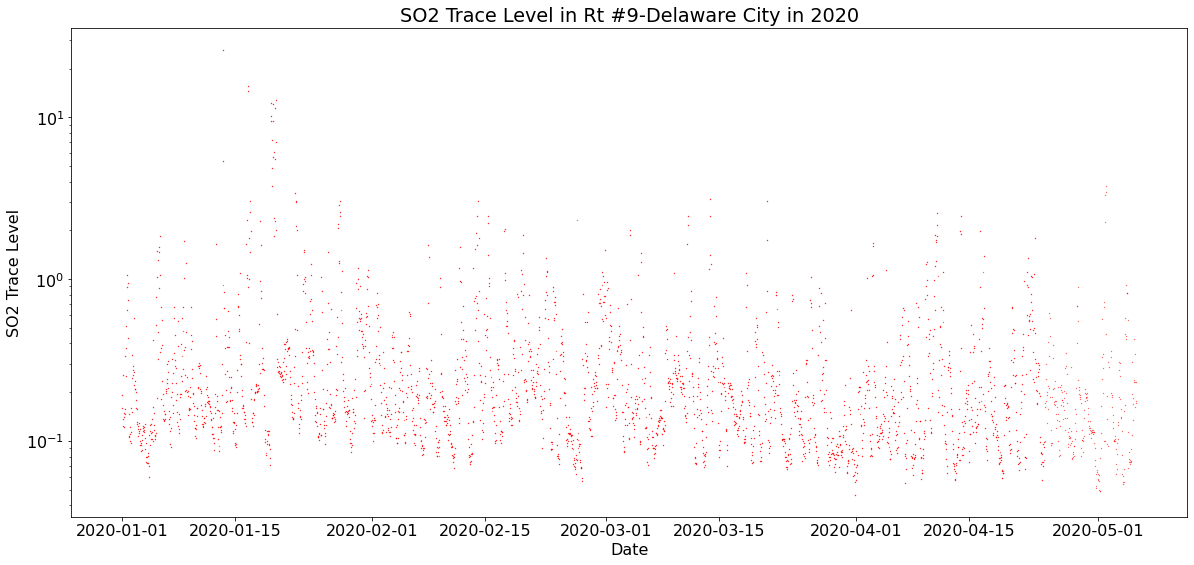

In [0]:
plt.figure(figsize=(20,9))
plt.semilogy(data['Date_Time'], data['ParamValue'], 'r.', markersize=0.5)
plt.xlabel('Date')
plt.ylabel(var_label)
plt.title(f'{var_label} in Rt #9-Delaware City in 2020')